In [ ]:
k=2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from numpy import save
from numpy import load

connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**fetching data**

[0.67436247] [-0.44462513]


<function matplotlib.pyplot.show(*args, **kw)>

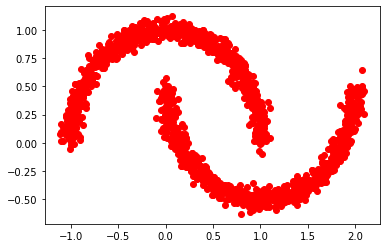

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment5Dataset.csv")
data.head()
x_old = data[["X1"]].values
y_old=data[["X2"]].values

print(x_old[0],y_old[0])
data_size=1500

for p in range(0,data_size):
  plt.scatter(x_old[p],y_old[p],c="red")

plt.show

**euclidian distance**

In [ ]:
def distance(p1,p2):
  
  
  return LA.norm(p1-p2)

**distance of each point from each point is stored in** euclid matrix

In [ ]:
"""euclid= np.zeros([data_size,data_size])
for i in range(0,data_size):
  point1=(data.loc[[i]]).values.transpose()
  for j in range(i+1,data_size):
    print(i,j)
    point2=(data.loc[[j]]).values.transpose()
    dis=distance(point1,point2)
    euclid[i][j]=dis

    euclid[j][i]=dis"""


'euclid= np.zeros([data_size,data_size])\nfor i in range(0,data_size):\n  point1=(data.loc[[i]]).values.transpose()\n  for j in range(i+1,data_size):\n    print(i,j)\n    point2=(data.loc[[j]]).values.transpose()\n    dis=distance(point1,point2)\n    euclid[i][j]=dis\n\n    euclid[j][i]=dis'

In [ ]:
"""save('/content/drive/MyDrive/Colab Notebooks/ml/euclidian_distance.npy', euclid)"""

"save('/content/drive/MyDrive/Colab Notebooks/ml/euclidian_distance.npy', euclid)"

In [ ]:
distance=load('/content/drive/MyDrive/Colab Notebooks/ml/euclidian_distance.npy')

**creating weight** by epsilon neighbour

In [ ]:

w= np.zeros([data_size,data_size], dtype = int)
min_distance=0.20


for i in range(0,data_size):
  for j in range(i+1,data_size):
    if(distance[i][j]<min_distance):
      w[i][j]=1
      w[j][i]=1


**Laplacian matrix creation**

In [ ]:

D= np.zeros([data_size, data_size], dtype = int)
for i in range(0,data_size):
  tmp=0
  for j in range(0,data_size):
    tmp+=w[i][j]
  D[i][i]=tmp
L=D-w
print(L)



[[210   0   0 ...   0   0   0]
 [  0 218  -1 ...   0  -1   0]
 [  0  -1 215 ...   0  -1   0]
 ...
 [  0   0   0 ... 218   0   0]
 [  0  -1  -1 ...   0 209   0]
 [  0   0   0 ...   0   0 220]]


**eign vector matrix of Laplacian creation**

In [ ]:
eignval,eignvector = np.linalg.eig(L)
df1 = pd.DataFrame(eignvector)

df1=df1.transpose()
df1.insert(loc=0,column='eignval',value=eignval)

df1.sort_values(by=["eignval"], inplace = True)

Q=df1.iloc[0:k,1:].transpose()
  


            0         1
0    -0.02582  0.024981
1    -0.02582  0.027057
2    -0.02582  0.027216
3    -0.02582  0.023282
4    -0.02582  0.026787
...       ...       ...
1495 -0.02582  0.028190
1496 -0.02582 -0.022335
1497 -0.02582 -0.028546
1498 -0.02582  0.027643
1499 -0.02582  0.024097

[1500 rows x 2 columns]


plotting Q matrix data point row wise

<function matplotlib.pyplot.show(*args, **kw)>

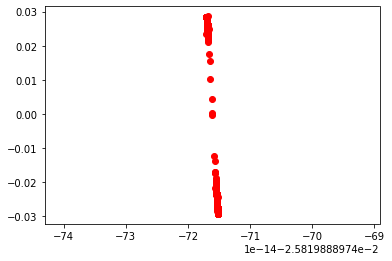

In [ ]:
x = Q[[0]].values
y=Q[[1]].values

for p in range(0,data_size):
  plt.scatter(x[p],y[p],c="red")

plt.show

# **Kmeans** applying

Euclidian distance function

In [ ]:
def distance(p1,p2):
  
  
  return np.dot((p1-p2).transpose(),(p1-p2))

kmeans code

In [ ]:

mean=[]
indexing=[]
for i in range(0,k):
  j=random.randint(0, data_size)
  
  mean.append((Q.loc[[j]]).values.transpose())
A = np.zeros([data_size, k], dtype = int)
for p in range(0,data_size):
  point=(Q.loc[[p]]).values.transpose()
  d=[]
  for i in range(0,k):
    d.append(distance(point,mean[i]).tolist())
  ind=d.index(min(d))
  indexing.append(ind)
  A[p][ind]=1


flag=True

while flag:  
  A_new = np.zeros([data_size, k], dtype = int)
  for i in range(0,k):
    n=0
    for p in range(0,data_size):
      mean[i]+=A[p][i]*(Q.loc[[p]]).values.transpose()
      n+=A[p][i]
    mean[i]=mean[i]/n

  for p in range(0,data_size):
    point=(Q.loc[[p]]).values.transpose()
    d=[]
    for i in range(0,k):
      d.append(distance(point,mean[i]).tolist())
    ind=d.index(min(d))
    indexing[p]=ind
    A_new[p][ind]=1
  if np.array_equal(A, A_new):
    flag=False
  A=A_new 
print(len(indexing))




1500


**Indexing[]** array contain which point belong to which cluster

<function matplotlib.pyplot.show(*args, **kw)>

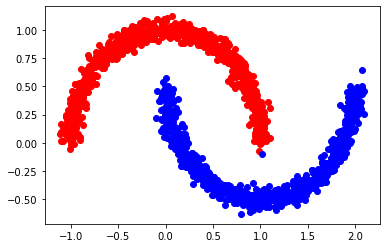

In [ ]:
color=["red","blue","yellow"]

for p in range(0,data_size):
  plt.scatter(x_old[p],y_old[p],c=color[indexing[p]])





plt.show
